In [30]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import plotly.express as px

In [31]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data
!unzip unsupervised-learning-on-country-data.zip

Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
unsupervised-learning-on-country-data.zip: Skipping, found more recently modified local copy (use --force to force download)


"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [32]:
import os
from zipfile import ZipFile

# Download the dataset
os.system('kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data')

# Unzip the downloaded dataset
with ZipFile('unsupervised-learning-on-country-data.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [33]:
# Load the dataset
df = pd.read_csv('Country-data.csv')

# Display the first few rows of the dataset
print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [34]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with any missing values
df_cleaned = df.dropna()

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataset
print(df_cleaned.head())

Missing values in each column:
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Number of duplicate rows: 0
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [35]:
# Get the summary statistics of the cleaned dataset
summary_stats = df_cleaned.describe()
print(summary_stats)

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [36]:
import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X = df[['income', 'health', 'inflation']]
y = df['life_expec']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             life_expec   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     37.31
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.07e-18
Time:                        13:56:41   Log-Likelihood:                -557.76
No. Observations:                 167   AIC:                             1124.
Df Residuals:                     163   BIC:                             1136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.5352      1.672     38.599      0.0

In [37]:
# Sort the dataframe by income, health, and life_expec in descending order
df_sorted = df_cleaned.sort_values(by=['income', 'health', 'life_expec'], ascending=False)

# Select the top 10 countries
top_10_countries = df_sorted.head(10)

# Display the top 10 countries
print(top_10_countries[['country', 'income', 'health', 'life_expec']])

                  country  income  health  life_expec
123                 Qatar  125000    1.81        79.5
91             Luxembourg   91700    7.77        81.3
23                 Brunei   80600    2.84        77.1
82                 Kuwait   75200    2.63        78.2
133             Singapore   72100    3.96        82.7
114                Norway   62300    9.48        81.0
157  United Arab Emirates   57600    3.66        76.5
145           Switzerland   55500   11.50        82.2
159         United States   49400   17.90        78.7
73                Ireland   45700    9.19        80.4


In [38]:
# Countries by Income
fig_map = px.choropleth(df_cleaned, 
                        locations="country", 
                        locationmode="country names", 
                        color="income", 
                        hover_name="country", 
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Countries by Income")

fig_map.show()

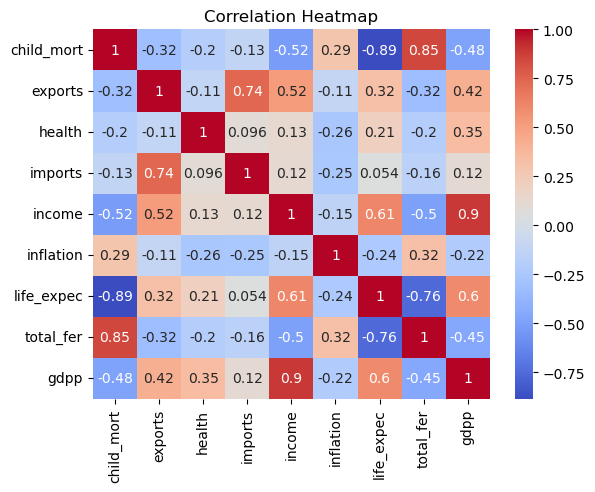

In [39]:
# Correlation Heatmap
corr = df.drop(columns=['country']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


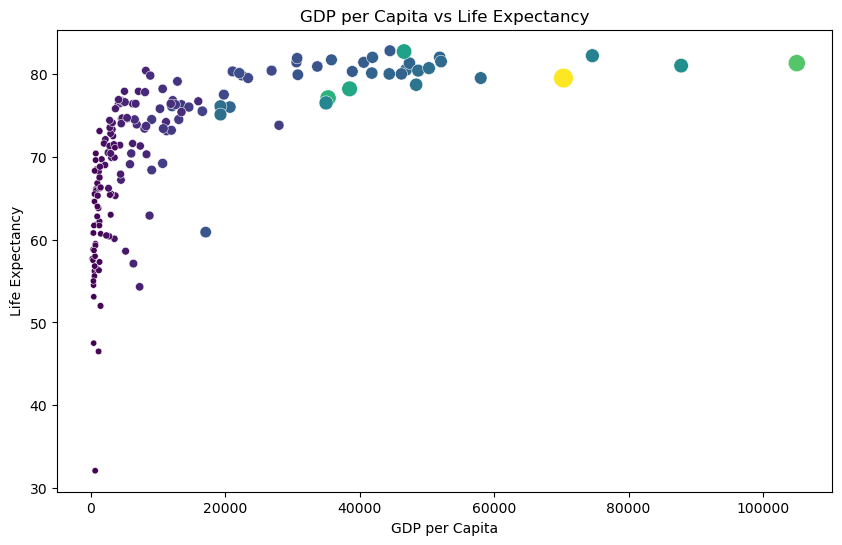

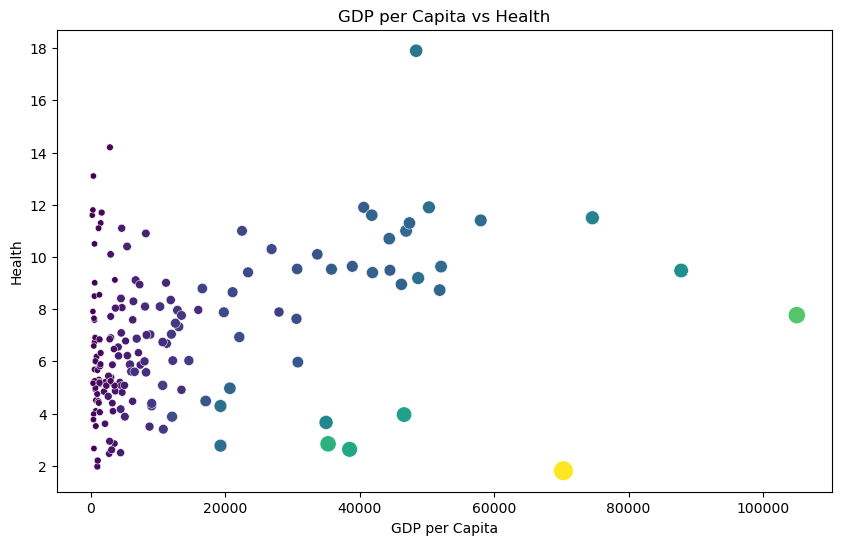

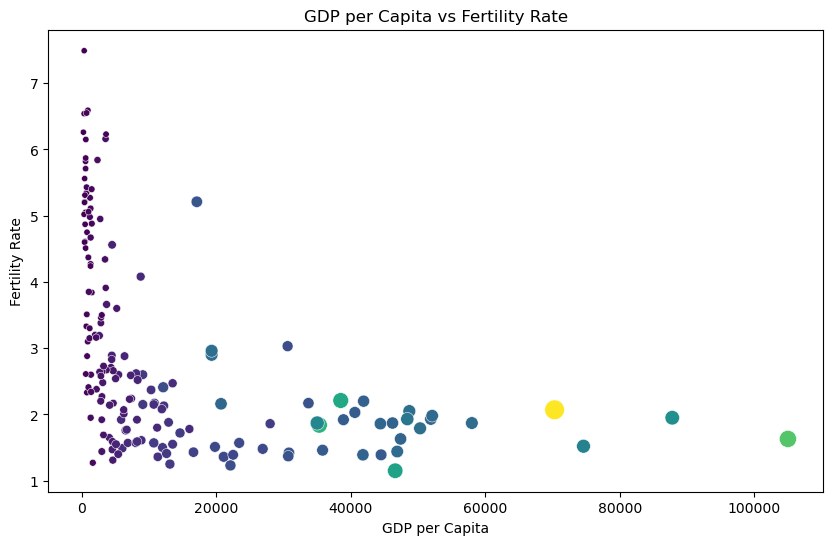

In [40]:
# Scatter plot: GDP per capita vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='gdpp', y='life_expec', hue='income', palette='viridis', size='income', sizes=(20, 200), legend=False)
plt.title('GDP per Capita vs Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot: GDP per capita vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='gdpp', y='health', hue='income', palette='viridis', size='income', sizes=(20, 200), legend=False)
plt.title('GDP per Capita vs Health')
plt.xlabel('GDP per Capita')
plt.ylabel('Health')
plt.show()

# Scatter plot: GDP per capita vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='gdpp', y='total_fer', hue='income', palette='viridis', size='income', sizes=(20, 200), legend=False)
plt.title('GDP per Capita vs Fertility Rate')
plt.xlabel('GDP per Capita')
plt.ylabel('Fertility Rate')
plt.show()

In [41]:
# Correlation between income and life expectancy
corr_income_life = df['income'].corr(df['life_expec'])
print(f"Correlation between Income and Life Expectancy: {corr_income_life}")



Correlation between Income and Life Expectancy: 0.6119624680973175


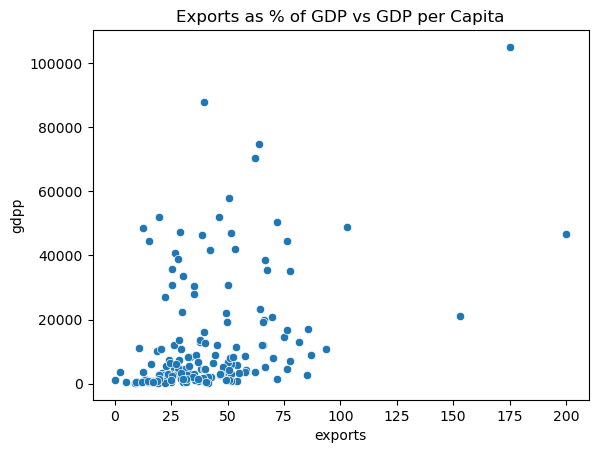

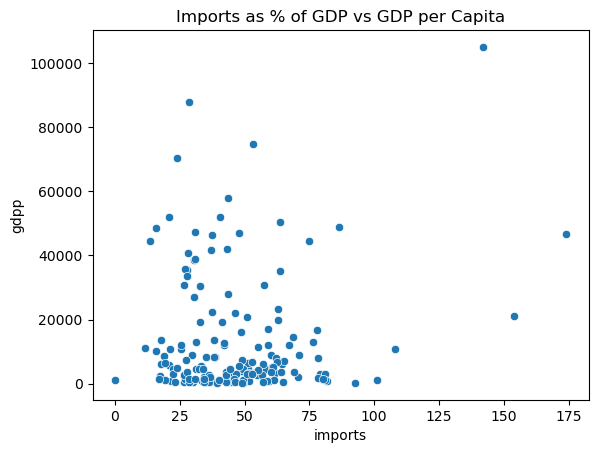

In [42]:
# Scatter plot: Exports vs GDP per Capita
sns.scatterplot(x='exports', y='gdpp', data=df)
plt.title('Exports as % of GDP vs GDP per Capita')
plt.show()

# Scatter plot: Imports vs GDP per Capita
sns.scatterplot(x='imports', y='gdpp', data=df)
plt.title('Imports as % of GDP vs GDP per Capita')
plt.show()